In [4]:
import pandas as pd
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
df = pd.read_json('D:\\Springboard_Capstone2\\ultimate_challenge\\logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [24]:
df.shape

(93142, 1)

### Displaying a list of all NULL values across all columns

In [25]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

login_time    0
dtype: int64


###### No Null Values 

## Part 1 ‑ Exploratory data analysis:

### Aggregate these login counts based on 15minute time intervals

In [9]:
#First index on the timestamp column, if you have not already done so:

df.set_index('login_time', inplace=True)

In [10]:
# Add a numeric column (you need something for resampling to aggregate):
df['count'] = 1

In [13]:
#And finally resample as needed:
df = df.resample('15T', how='sum')
df.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [21]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


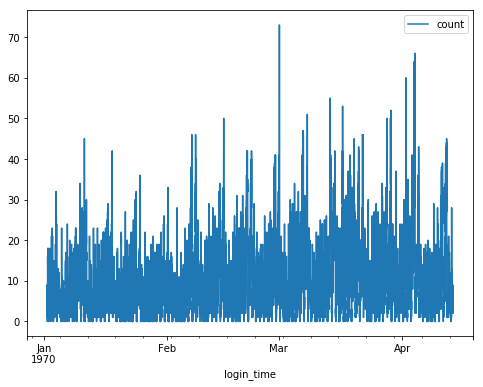

In [22]:
df.plot()

## Part 2 ‑ Experiment and metrics design

##### Q1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

##### Ans:  I would choose the test statistic as mean of the number of times driver partners serving both cities before and after the experiment is conducted. The core of the problem is to encourage more drivers serving both cities due to alternate rhythmic functioning of driver in both cities.

##### Q2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

###### a. how you will implement the experiment
###### b. what statistical test(s) you will conduct to verify the significance of the observation
###### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Answer: 
##### T-Tests for Comparing Two Proportions:

###### The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.¶

###### Null Hypothesis: To answer this question, we will evaluate the hypothesis that the two proportions (number of drivers serving before and after experiment is performed ) are the same i.e., p1 = p2.
###### Alternate Hypothesis: To answer this question, we will evaluate the hypothesis that the two proportions(number of drivers serving before and after experiment is performed ) are not the same i.e., p1 != p2.
##### Two Samples T-test for Proportions
###### z = (p1 - p2 -delta)/sqrt(p1(1-p1)*(1/n1 +1/n2 ))
###### where
###### p1 = x1/ n1
###### p2 = x2/n2

###### In this experiment, x1 => Number of drivers serving before the experiment was implemented.
###### In this experiment, x2 => Number of drivers serving after the experiment was implemented.
###### In this experiment, n1 => Number of days considered before the experiment was implemented.
###### In this experiment, n2 => Number of days considered after the experiment was implemented.
###### In this experiment, where x1 and x2 are the sample proportions, delta is their hypothesized difference (0 if testing for equal proportions).

#### Following is how we interpret the results:

#### Lets consider we calculate z to be -1.518 then lower critical z‐value (i.e., it is many standard deviations away from the mean ) for α = 0.10 then we reject the null hypothesis of equal proportions. 


# Part 3 ‑ Predictive modeling

In [5]:
from datetime import datetime
from dateutil.parser import parse
import json

In [43]:

with open('D://Springboard_Capstone2//ultimate_challenge//ultimate_data_challenge.json') as f:
   data = json.load(f)

df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


### Displaying a list of all NULL values across all columns

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
dtype: int64


## Determining Outliers in our Data

In [45]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


###### Following variables/columns in the dataset are more than 3 standard deviations away from the mean. 
###### 1. trips_in_first_30_days	
###### 2. surge_pct
###### 3. avg_surge
###### 4. avg_dist

#### We need to check if the variables are normally distributed. If anyone these variables are normally distributed, we can safely conclude that the following variables have outliers.

## Determining if 'trips_in_first_30_days' column has outliers

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


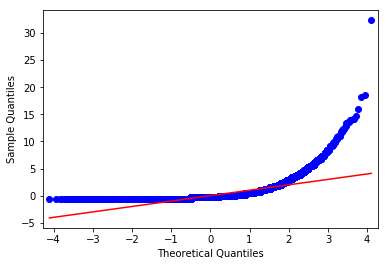

In [46]:
from sklearn import preprocessing
import numpy as np
import statsmodels.api as sm
import pylab


Full_Time_Four_Years=df['trips_in_first_30_days'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

###### The "trips_in_first_30_days" column is not normally distributed.

## Determining if 'surge_pct' is normally distributed

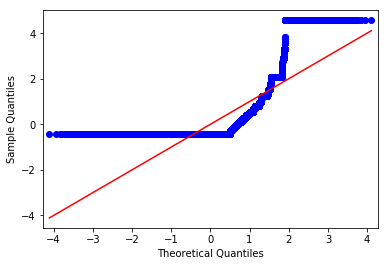

In [47]:
Full_Time_Four_Years=df['surge_pct'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

##### The "surge_pct" column is not normally distributed.

## Determining if 'avg_surge' is normally distributed

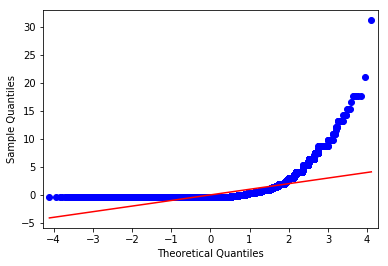

In [48]:
Full_Time_Four_Years=df['avg_surge'].values
X_scaled = preprocessing.scale(Full_Time_Four_Years)

sm.qqplot(X_scaled, line='s')
pylab.show()

###### The "surge_pct" column is not normally distributed.

### We now conclude that none of the variables have outliers.

## Applying Linear Interpolation to deal with NaN Values 

In [49]:
#Linear Interpolation for missing data: ‘linear’: ignore the index and treat the values as equally spaced. This is the only 
df = df.interpolate(method='linear')

In [50]:
# Forward Filling NaN values
df['phone'] = df['phone'].ffill()

### Rechecking the Status of Missing values

In [51]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
dtype: int64


## Applying Dickey-Fuller to check if the 'trips_in_first_30_days' is stationary:

In [82]:
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

In [53]:
df_test = df[['last_trip_date','trips_in_first_30_days']]

In [54]:
# Convert the index to a datetime object
df_test.index = pd.to_datetime(df_test.last_trip_date, format='%Y-%m-%d')
df_test = df_test[['trips_in_first_30_days']]


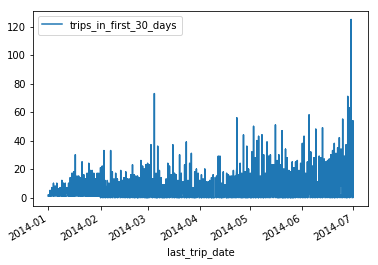

In [55]:
# Plot average trips_in_first_30_days
df_test.plot()
plt.show()


In [56]:
# Compute and print ADF p-value
result = adfuller(df_test['trips_in_first_30_days'])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.0


###### The low P-Value indicates that the Null Hypothesis is rejected i.e., Data is not Stationary .This can also be observed from the plot above where we can clarly see that the plot is non Mean Reverting and gradually the number of Bikers is increasing.

## Applying Random Forest Classification Technique to clearly classify  whether or not a user will be active in their 6th month on the system

In [84]:
# Change columns to DateTime objects.
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [85]:
# Beginning and ending DateTime for 'signup_date'# Beginn 
min(df['signup_date']), max(df['signup_date'])

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-01-31 00:00:00'))

In [86]:
# Beginning and ending DateTime for 'last_trip_date'# Beginn 
min(df['last_trip_date']), max(df['last_trip_date'])

(Timestamp('2014-01-01 00:00:00'), Timestamp('2014-07-01 00:00:00'))

In [87]:

# A user is retained if they were “active” (i.e. took a trip) in the preceding 30 days.# A user 
# The maximum 'last_trip_date' is 2014-07-01. So the preceding-30-day cutoff is 2014-06-01.

df.loc[df['last_trip_date'] >= '2014-06-01', 'retained'] = 1
df.loc[df['last_trip_date'] < '2014-06-01', 'retained'] = 0

In [88]:
print('The fraction of users retained is: ' + str(df.retained.mean()))

The fraction of users retained is: 0.37608


In [73]:
df_features = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'city', 'last_trip_date', 'phone', 'signup_date', 'surge_pct',
       'trips_in_first_30_days', 'weekday_pct']]
df_target =df[['ultimate_black_user']]

## Finding Least Correlated Features in the Feature Set

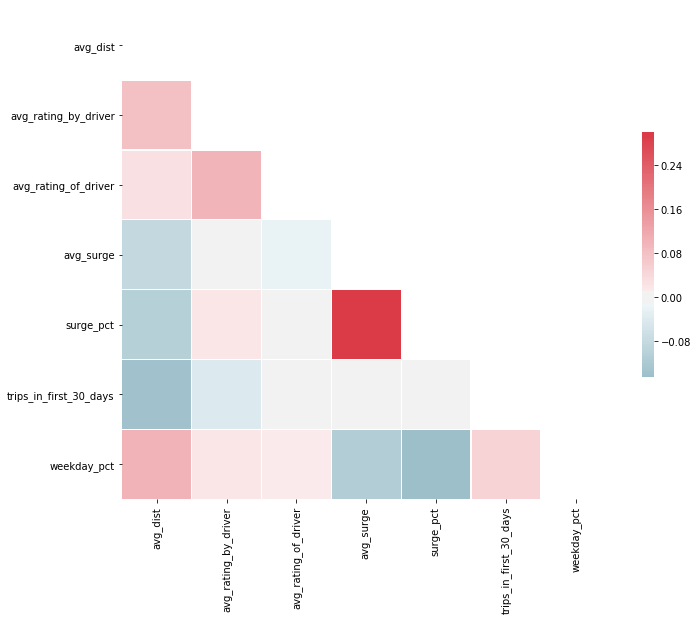

In [58]:
import seaborn as sns
# Compute the correlation matrix
corr = df_features.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
# After excluding the correlated features 
df_features = df[['avg_dist', 'avg_rating_by_driver',  'avg_surge','trips_in_first_30_days']]

## Vectorizing Feature and Label columns in order to fit it to classifier

## Splitting data into Train and Test set respectively

In [60]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df_features, df_target, test_size = 0.25, random_state = 42)

## Train The Random Forest Classifier

In [61]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

In [68]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train_features, train_labels)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Model Prediction

In [69]:
prediction = rf.predict(test_features)

In [70]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(test_labels, prediction))

0.5199700208810214


In [72]:
import pandas as pd
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = train_features.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
avg_dist,0.724024
avg_surge,0.110075
trips_in_first_30_days,0.087141
avg_rating_by_driver,0.078759


In [92]:
# I built three models: random forest, logistic regression and Gaussian naive bayes. 
# Random forest model performed the best.